In [7]:
import torch
import torch.nn as nn
from torchviz import make_dot
from IPython.display import Image

In [8]:
class Net_1(nn.Module):
    def __init__(self):
        super(Net_1, self).__init__()
        self.layer = nn.Sequential(
            nn.Linear(232, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(32, 4)
        )
        
    def forward(self, x):
        x = self.layer(x)
        return nn.functional.softmax(x, dim=1)

In [9]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ResidualBlock, self).__init__()
        self.linear = nn.Linear(in_channels, out_channels)
        self.relu = nn.ReLU()
        if in_channels != out_channels:
            self.linear_shortcut = nn.Linear(in_channels, out_channels)
        else:
            self.linear_shortcut = nn.Identity()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        out = self.linear(x)
        out = self.relu(out)
        out = self.dropout(out)
        shortcut = self.linear_shortcut(x)
        out += shortcut
        return out

class Net_2(nn.Module):
    def __init__(self):
        super(Net_2, self).__init__()
        self.layer = nn.Sequential(
            ResidualBlock(232, 128),  # 增加每层的单元数
            ResidualBlock(128, 128),
            ResidualBlock(128, 64),
            ResidualBlock(64, 32),
            nn.Dropout(0.5),
            nn.Linear(32, 4)  # num_classes是你的类别数量
        )
        
    def forward(self, x):
        x = self.layer(x)
        return nn.functional.softmax(x, dim=1)

In [18]:
# 实例化模型
model_1 = Net_1()
model_2 = Net_2()

# 创建一个示例输入张量
x = torch.randn(1, 232)

# 获取模型输出
y_1 = model_1(x)
y_2 = model_2(x)

# 绘制模型结构图
dot_1 = make_dot(y_1, params=dict(model_1.named_parameters()))
dot_2 = make_dot(y_2, params=dict(model_2.named_parameters()))

# 修改图的方向为横向
# dot_1.graph_attr['rankdir'] = 'LR'
# dot_2.graph_attr['rankdir'] = 'LR'

# 保存模型结构图
dot_1.format = 'png'
dot_2.format = 'png'
dot_1.render('Sequential_model_structure')
dot_2.render('Residual_model_structure')

'Residual_model_structure.png'

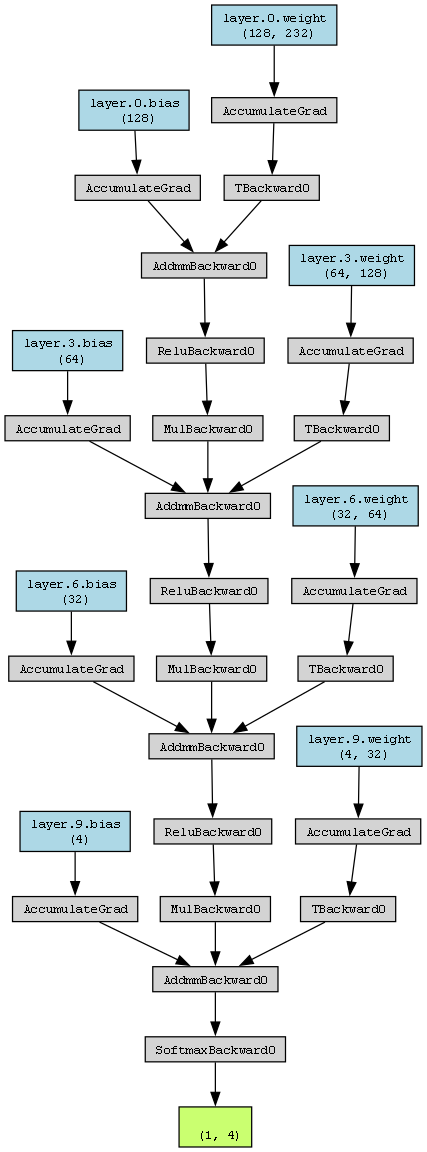

In [19]:
# 显示模型结构图
Image(filename='Sequential_model_structure.png')

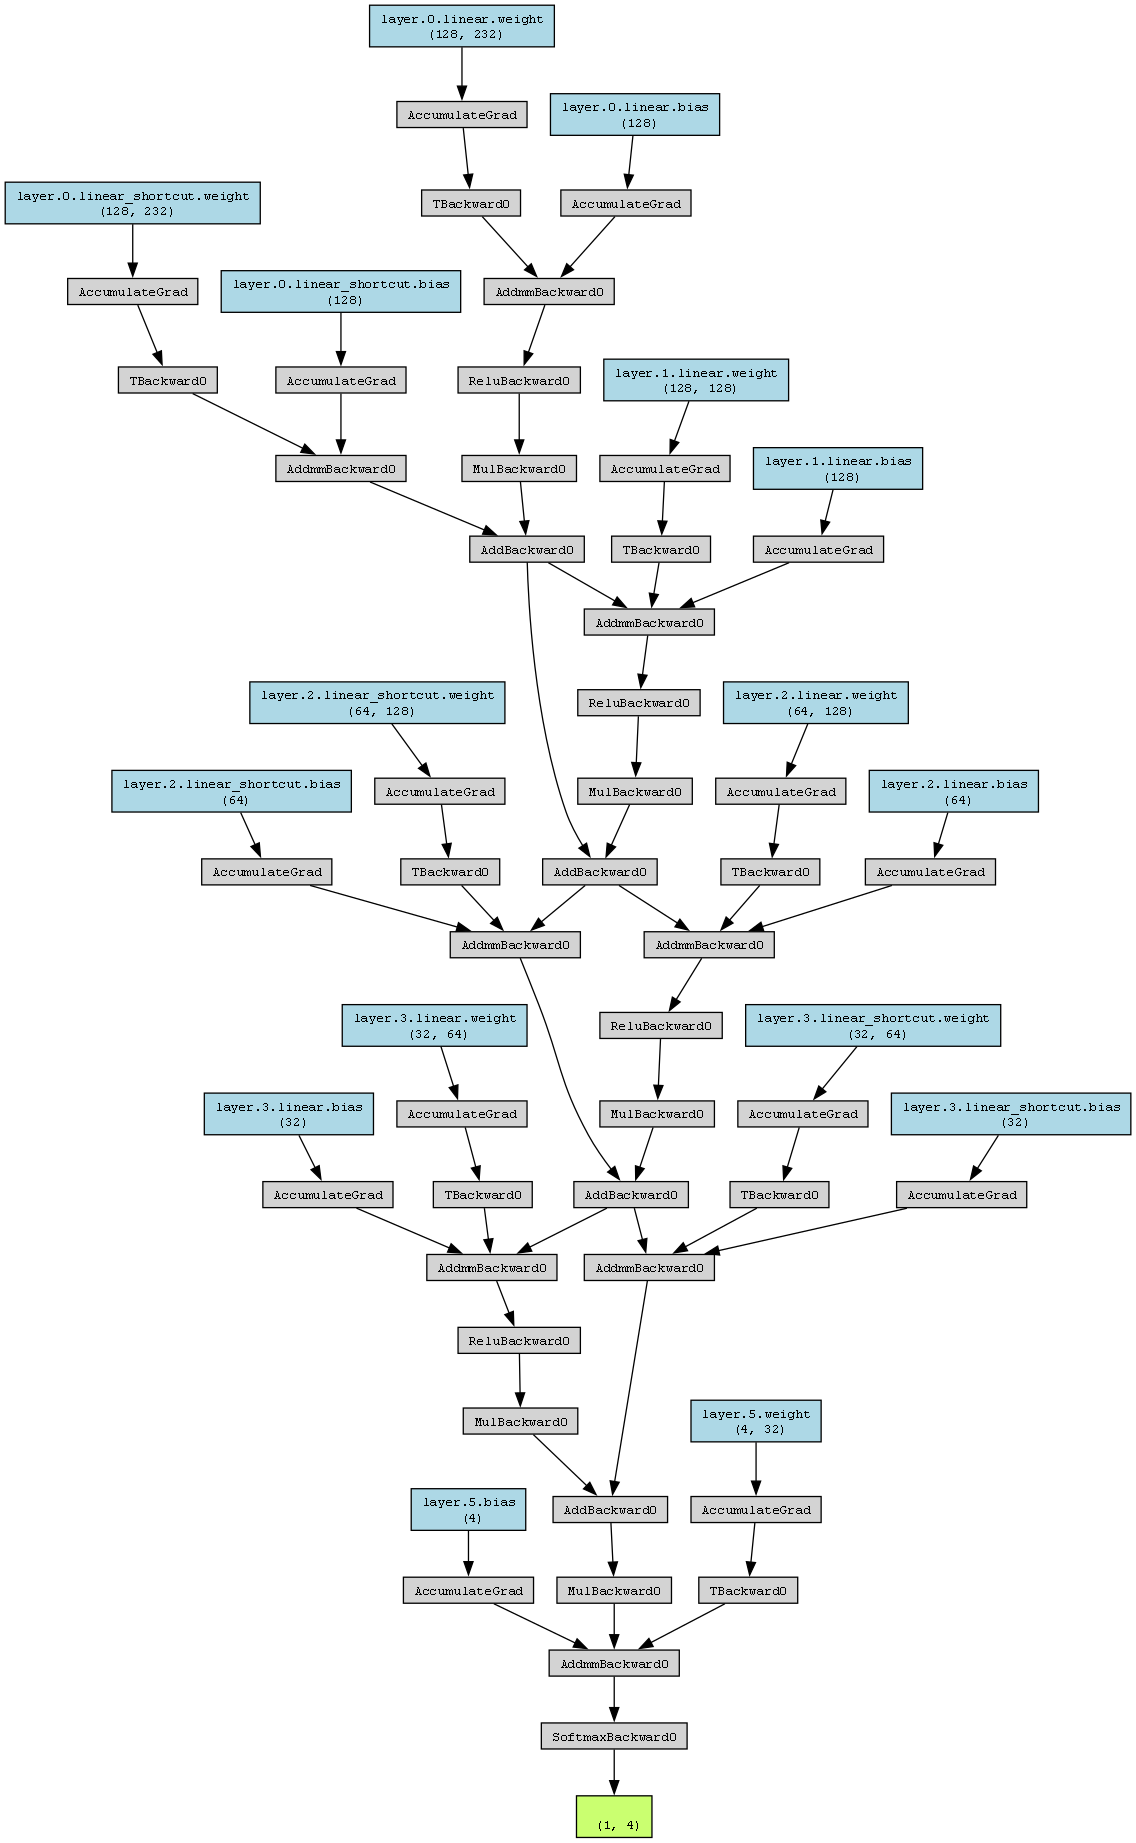

In [20]:
Image(filename='Residual_model_structure.png')